# This is an example of absolute bulk shear-wave velocities conversion to temperature using Gibbs-free-energy minimization 

In [16]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from matplotlib.tri import Triangulation
import math

# Loading the library containing functions to do the conversions

In [17]:
import V2RhoT_gibbs_lib as lib

# Loading the shear-wave seismic velocities model
This is a absolute shear-wave velocity model of North Atlantic and has been extracted as a function of ocean-floor age.

In [18]:
tomo_in = np.loadtxt('./Example/CSEM_WMed_200km.dat',skiprows=1)


# Doing the conversion to temperature

# Loading velcoity and density table from the Gibbs-free energy minimization
First, we will load the pre-computed anharmonic seismic velocties using the Generator subprogram of LitMod2D_2.0 which used Perple_X to do the Gibbs-free-energy minimization. Tables are generated for a give bulk-rock composition in terms of 5 major oxides (NCFMAS system) that account for ~99% composition of the mantle. The precomputed "look-up tables" are generated using the augmented‐modified version of Holland and Powell (1998) thermodynamic database (Afonso & Zlotnik, 2011). The choice of this thermodynamic is based on Kumar et al., 2020.  

Here I am using the DMM (Depleted Mid-oceanic-ridge-basalt mantle)composition for the conversion which is a representative of the asthenosphere. 

In [19]:
DMM_no_atten = np.loadtxt('./databases/DMM_HP')


# Correction for anelasticity and melts
Velocities computed from Perple_X are anharmonic and in order compare them with the velocities modelled in tomography we need to correct for anelasticity and melts and both of these decreases the seimic velocity. 

In [28]:
# correction using grain size = 10 mm and oscillatio period of 75 seconds.
DMM_atten_corrected = np.copy(DMM_no_atten)
for i in range(len(DMM_atten_corrected)):
    DMM_atten_corrected[i,3],DMM_atten_corrected[i,4] = lib.atten_correction(DMM_atten_corrected[i,0],DMM_atten_corrected[i,1]*100000,
                                                         DMM_atten_corrected[i,3],DMM_atten_corrected[i,4],75,10)

# correction for melts
DMM_atten_melt_corrected = np.copy(DMM_atten_corrected)
melt = np.zeros_like(DMM_atten_melt_corrected[:,0])
for i in range(len(DMM_atten_melt_corrected)):
    DMM_atten_melt_corrected[i,3],DMM_atten_melt_corrected[i,4],melt[i] = lib.velocity_melt_correction_mantle(DMM_atten_melt_corrected[i,0]-273.15,
                                                                                             DMM_atten_melt_corrected[i,1]/10000,
                                                             DMM_atten_melt_corrected[i,3],DMM_atten_melt_corrected[i,4])


# Doing the conversion


In [29]:
out=lib.vel_to_temp(tomo_in,DMM_atten_melt_corrected)

In [30]:
#Plotting

Text(0.5, 0.98, 'CSEM: 200km depth')

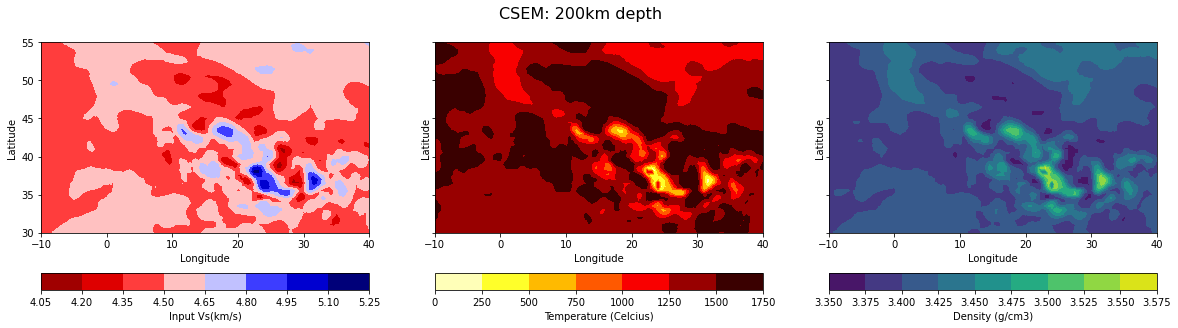

In [31]:
from matplotlib.tri import Triangulation
tri = Triangulation(out[:,0],out[:,1])
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True,figsize=(20, 5))
m_vs_in = ax[0].tricontourf(tri, out[:, 3],cmap='seismic_r')#,levels=np.arange(3.1, 5.70, 0.1))
m_t_out = ax[1].tricontourf(tri, out[:, 4], cmap='hot_r')#,levels=np.arange(400, 1800, 100))
m_dens_out = ax[2].tricontourf(tri, out[:, 5]/1000)#, levels=np.arange(3.000, 3.800, 0.05))
#m_d = ax[2].tricontourf(tri, density, cmap='plasma', levels=np.arange(3280, 3340, 5))
for a in ax:
        #a.set_aspect('equal')
        #a.set_ylim([-400,0])
        a.set_xlabel('Longitude')
        a.set_ylabel('Latitude')
fig.colorbar(m_vs_in, ax=ax[0], label='Input Vs(km/s)', orientation='horizontal')
fig.colorbar(m_t_out, ax=ax[1], label='Temperature (Celcius)', orientation='horizontal')
fig.colorbar(m_dens_out, ax=ax[2], label='Density (g/cm3)', orientation='horizontal')
fig.suptitle('CSEM: 200km depth', fontsize=16)